<a href="https://colab.research.google.com/github/deralph/Diabetes-prediction-model/blob/main/GestationLDiabetes.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [ ]:
diabetes_data=pd.read_csv('Gestational Diabetes.csv')
diabetes_data.head()

,Age,Pregnancy No,Weight,Height,BMI,Heredity,Prediction
0,17.0,1.0,48.0,165.0,17.6,0,0
1,17.0,1.0,49.0,145.0,23.3,0,0
2,17.0,1.0,50.0,140.0,25.5,0,0
3,17.0,1.0,50.0,145.0,23.8,0,0
4,17.0,1.0,49.0,146.0,23.0,0,0


In [ ]:
diabetes_data.shape

(1012, 7)

In [ ]:
diabetes_data.isna().sum().sort_values()

Age             0
Pregnancy No    0
Weight          0
Height          0
BMI             0
Heredity        0
Prediction      0
dtype: int64

In [ ]:
diabetes_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1012 entries, 0 to 1011
Data columns (total 7 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Age           1012 non-null   float64
 1   Pregnancy No  1012 non-null   float64
 2   Weight        1012 non-null   float64
 3   Height        1012 non-null   float64
 4   BMI           1012 non-null   float64
 5   Heredity      1012 non-null   int64  
 6   Prediction    1012 non-null   int64  
dtypes: float64(5), int64(2)
memory usage: 55.5 KB


In [ ]:
diabetes_data['Age']=diabetes_data['Age'].astype(int)
diabetes_data['Pregnancy No']=diabetes_data['Pregnancy No'].astype(int)
diabetes_data.head()



,Age,Pregnancy No,Weight,Height,BMI,Heredity,Prediction
0,17,1,48.0,165.0,17.6,0,0
1,17,1,49.0,145.0,23.3,0,0
2,17,1,50.0,140.0,25.5,0,0
3,17,1,50.0,145.0,23.8,0,0
4,17,1,49.0,146.0,23.0,0,0


In [ ]:
diabetes_data['Height']=diabetes_data['Height'].apply(lambda x: int(x) if x%1==0 else x)
diabetes_data['Weight']=diabetes_data['Weight'].apply(lambda x: int(x) if x%1==0 else x)
diabetes_data.head()

,Age,Pregnancy No,Weight,Height,BMI,Heredity,Prediction
0,17,1,48,165,17.6,0,0
1,17,1,49,145,23.3,0,0
2,17,1,50,140,25.5,0,0
3,17,1,50,145,23.8,0,0
4,17,1,49,146,23.0,0,0


In [ ]:
diabetes_data.describe()

,Age,Pregnancy No,Weight,Height,BMI,Heredity,Prediction
count,1012.000000,1012.000000,1012.000000,1012.000000,1012.000000,1012.000000,1012.000000
mean,30.357708,2.517787,72.988142,158.154150,29.256818,0.226285,0.214427
std,7.022960,1.530656,12.552712,7.367421,5.092321,0.418632,0.410627
min,16.000000,1.000000,43.000000,135.000000,16.000000,0.000000,0.000000
25%,24.000000,1.000000,64.750000,153.000000,25.700000,0.000000,0.000000
50%,30.000000,2.000000,70.000000,158.000000,28.900000,0.000000,0.000000
75%,36.000000,3.000000,80.000000,164.000000,32.000000,0.000000,0.000000
max,45.000000,9.000000,126.000000,196.000000,54.300000,1.000000,1.000000


In [ ]:
percentage_positive_prediction=diabetes_data['Prediction'].mean()*100
print(percentage_positive_prediction)

21.442687747035574


In [ ]:
def classify_bmi(bmi):
  if bmi<18.5:
    return 'Underweight'
  elif bmi>=18.5 and bmi<25:
    return 'Normal'
  elif bmi>=25 and bmi<30:
    return 'Overweight'
  else:
    return 'Obese'

In [ ]:
classified_data=diabetes_data.copy()
classified_data['BMI_class']=classified_data['BMI'].apply(classify_bmi)
classified_data.head()

,Age,Pregnancy No,Weight,Height,BMI,Heredity,Prediction,BMI_class
0,17,1,48,165,17.6,0,0,Underweight
1,17,1,49,145,23.3,0,0,Normal
2,17,1,50,140,25.5,0,0,Overweight
3,17,1,50,145,23.8,0,0,Normal
4,17,1,49,146,23.0,0,0,Normal


In [ ]:
classified_data['Prediction'].value_counts()

Prediction
0    795
1    217
Name: count, dtype: int64

In [ ]:
classified_data['BMI_class'].value_counts()

BMI_class
Overweight     413
Obese          405
Normal         188
Underweight      6
Name: count, dtype: int64

In [ ]:
def pivot_column(column,dataframe):
  group_dataframe=dataframe.groupby([column,'Prediction']).agg({'Prediction':['count']}).reset_index()
  group_dataframe.columns=['_'.join(filter(None,col)) if isinstance(col,tuple) else col for col in group_dataframe.columns]
  group_dataframe.head()

  pivoted_data=group_dataframe.pivot(index=column, columns='Prediction', values="Prediction_count").fillna(0)
  pivoted_data.head()
  return pivoted_data

In [ ]:
def percentage_check(column,dataframe):
  total_prediction=dataframe.groupby(column).agg({'Prediction':'count'}).rename(columns={'Prediction':'total'}).reset_index()
  correct_prediction=dataframe[dataframe['Prediction']==1].groupby(column).agg({'Prediction':'count'}).rename(columns={'Prediction':'correct'}).reset_index()
  merged_data=pd.merge(total_prediction,correct_prediction,on=column,how='left')
  merged_data['percentage']=(merged_data['correct']/merged_data['total'])*100
  merged_data.head()
  return merged_data

In [ ]:
percentage_check('Pregnancy No',classified_data)

,Pregnancy No,total,correct,percentage
0,1,297,27,9.090909
1,2,315,46,14.603175
2,3,177,55,31.073446
3,4,119,34,28.571429
4,5,45,24,53.333333
5,6,34,17,50.000000
6,7,18,9,50.000000
7,8,4,4,100.000000
8,9,3,1,33.333333


In [ ]:
percentage_check('Heredity',classified_data)

,Heredity,total,correct,percentage
0,0,783,79,10.089400
1,1,229,138,60.262009


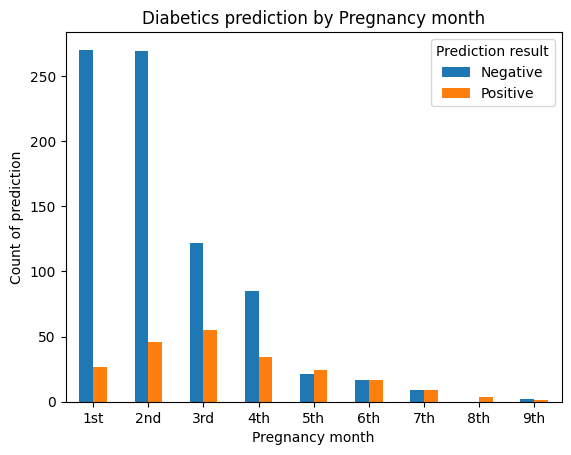

In [ ]:

pregnancy_No_pivot_data = pivot_column('Pregnancy No',classified_data)


ax=pregnancy_No_pivot_data.plot(kind='bar',stacked=False)
ax.set_xticklabels(['1st','2nd','3rd','4th','5th','6th','7th','8th','9th'],rotation=0)
plt.title("Diabetics prediction by Pregnancy month" )
plt.xlabel("Pregnancy month")
plt.ylabel("Count of prediction")
plt.legend(title="Prediction result",labels=["Negative","Positive"])
plt.show()

# or

# pivot_data = classified_data.pivot_table(index='Pregnancy No', columns='Prediction', values='Age', aggfunc='count')
# pivot_data.plot(kind='bar', stacked=False, title='Pregnancy No vs. Prediction')

# or
# pd.crosstab(df[col], df['Prediction']).plot(kind='bar', stacked=True)

# or
# sns.pairplot(df, hue='Prediction', diag_kind='kde')
# plt.show()


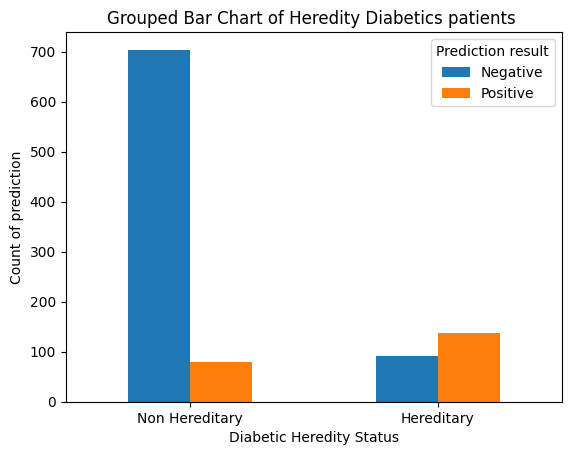

In [ ]:

heredity_pivot_data = pivot_column('Heredity',classified_data)

ax=heredity_pivot_data.plot(kind='bar',stacked=False)
ax.set_xticklabels(['Non Hereditary','Hereditary'],rotation=0)
plt.title("Grouped Bar Chart of Heredity Diabetics patients " )
plt.xlabel("Diabetic Heredity Status")
plt.ylabel("Count of prediction")
plt.legend(title="Prediction result",labels=["Negative","Positive"])
plt.show()

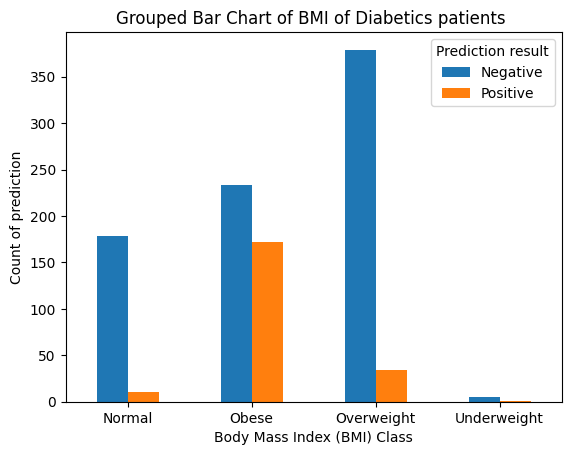

In [ ]:
BMI_pivot_data = pivot_column('BMI_class',classified_data)

ax=BMI_pivot_data.plot(kind='bar',stacked=False)
ax.set_xticklabels(ax.get_xticklabels(),rotation=0)
plt.title("Grouped Bar Chart of BMI of Diabetics patients " )
plt.xlabel("Body Mass Index (BMI) Class")
plt.ylabel("Count of prediction")
plt.legend(title="Prediction result",labels=["Negative","Positive"])
plt.show()

<Axes: title={'center': 'BMI CLASS'}, ylabel='count'>

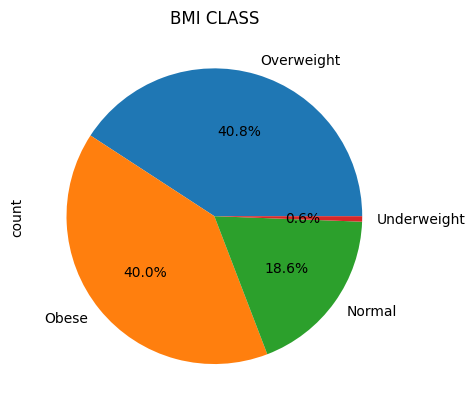

In [ ]:
classified_data['BMI_class'].value_counts().plot(kind='pie', autopct='%1.1f%%', title='BMI CLASS')

In [ ]:
diabetes_data.head()

,Age,Pregnancy No,Weight,Height,BMI,Heredity,Prediction
0,17,1,48,165,17.6,0,0
1,17,1,49,145,23.3,0,0
2,17,1,50,140,25.5,0,0
3,17,1,50,145,23.8,0,0
4,17,1,49,146,23.0,0,0


<Axes: >

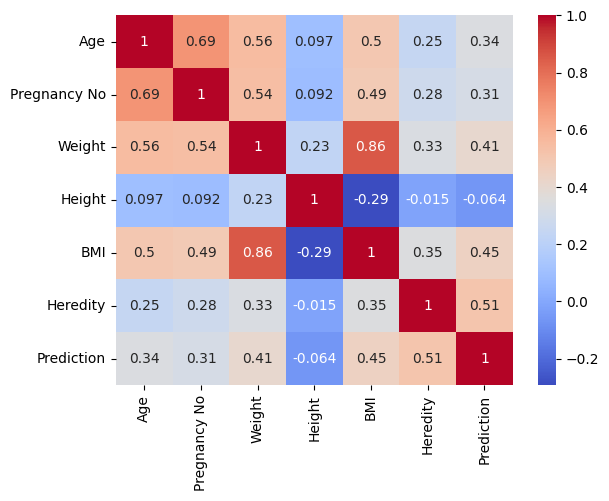

In [ ]:
sns.heatmap(diabetes_data.corr(), annot=True, cmap='coolwarm')

In [ ]:
diabetes_data=diabetes_data.drop('Weight',axis=1)

<Axes: >

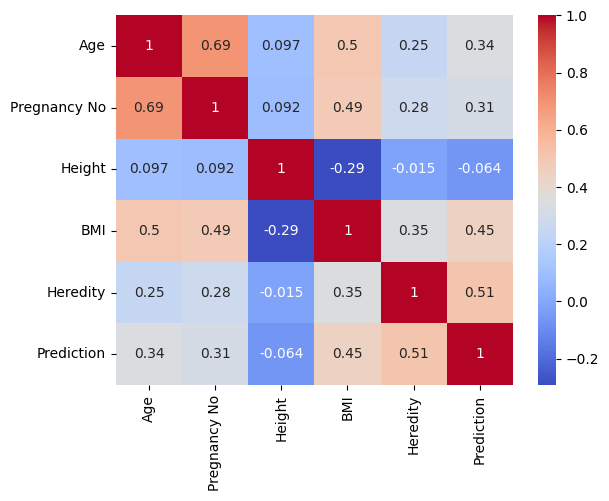

In [ ]:
sns.heatmap(diabetes_data.corr(),annot=True,cmap='coolwarm')

In [ ]:
# sns.pairplot(diabetes_data, hue='Prediction', diag_kind='kde')
# plt.show()


In [ ]:
from sklearn.model_selection import train_test_split,cross_val_score,KFold
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import roc_curve,roc_auc_score,precision_score,recall_score
from sklearn.metrics import confusion_matrix,classification_report
from imblearn.over_sampling import SMOTE

In [ ]:
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=1111)
model=LogisticRegression()


In [ ]:

smote = SMOTE()
X_train_smote, y_train_smote = smote.fit_resample(X_train, y_train)

In [ ]:
X=diabetes_data.drop('Prediction',axis=1)
y=diabetes_data['Prediction']



model.fit(X_train,y_train)
# y_pred_probs=model.predict_proba(X_test)[:,1]
# print(y_pred_probs[0])

y_pred= model.predict(X_test)
# print('threshold = ',i)
# y_pred=(y_pred_probs>=0.32999999999999985).astype(int)
print('test acuracy ',model.score(X_test,y_test))
print('test acuracy ',model.score(X_test,y_test))
print(confusion_matrix(y_test,y_pred))
print(classification_report(y_test,y_pred))


test acuracy  0.8078817733990148
test acuracy  0.8078817733990148
[[137  28]
 [ 11  27]]
              precision    recall  f1-score   support

           0       0.93      0.83      0.88       165
           1       0.49      0.71      0.58        38

    accuracy                           0.81       203
   macro avg       0.71      0.77      0.73       203
weighted avg       0.84      0.81      0.82       203



In [ ]:
# Access the trained LogisticRegression model coefficients
coeffiecients = model.named_steps['logreg'].coef_[0]


feature_importances=pd.DataFrame({"coeficients":coeffiecients,"features":X.columns})
feature_importances

,coeficients,features
0,0.066164,Age
1,-0.046234,Pregnancy No
2,0.028957,Height
3,0.170629,BMI
4,2.156968,Heredity


In [ ]:
model.get_params()

{'C': 1.0,
 'class_weight': 'balanced',
 'dual': False,
 'fit_intercept': True,
 'intercept_scaling': 1,
 'l1_ratio': None,
 'max_iter': 100,
 'multi_class': 'auto',
 'n_jobs': None,
 'penalty': 'l2',
 'random_state': None,
 'solver': 'lbfgs',
 'tol': 0.0001,
 'verbose': 0,
 'warm_start': False}

In [ ]:
kf=KFold(n_splits=6,shuffle=True,random_state=42)
cvresults=cross_val_score(model,X,y,cv=kf)
cvresults

array([0.77514793, 0.81656805, 0.83431953, 0.83431953, 0.79166667,
       0.79166667])

In [ ]:
print(np.quantile(cvresults,[0.025,0.975]))

[0.77721277 0.83431953]


In [ ]:
y_pred_probs=model.predict_proba(X_test)[:,1]
print(y_pred_probs[0])

0.11737828183602741


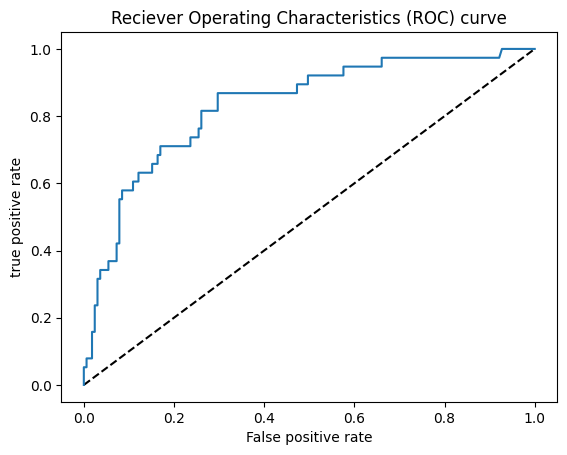

In [ ]:
# plotting the reciever operating characteristics (ROC)

fpr,tpr,thresholds=roc_curve(y_test,y_pred_probs)
plt.plot([0,1],[0,1],'k--')
plt.plot(fpr,tpr)
plt.xlabel("False positive rate")
plt.ylabel("true positive rate")
plt.title('Reciever Operating Characteristics (ROC) curve')
plt.show()

In [ ]:
#Area Under the ROC Curve
roc_score = roc_auc_score(y_test,y_pred_probs)
print(roc_score)

0.8318181818181818


In [ ]:
model.get_params()

{'C': 1.0,
 'class_weight': 'balanced',
 'dual': False,
 'fit_intercept': True,
 'intercept_scaling': 1,
 'l1_ratio': None,
 'max_iter': 100,
 'multi_class': 'auto',
 'n_jobs': None,
 'penalty': 'l2',
 'random_state': None,
 'solver': 'lbfgs',
 'tol': 0.0001,
 'verbose': 0,
 'warm_start': False}

## **Using decision trees**

In [ ]:
from sklearn import tree

In [ ]:
DecisionTreeModel=tree.DecisionTreeClassifier(max_depth = 5)
DecisionTreeModel.fit(X_train,y_train)
y_decision_pred = DecisionTreeModel.predict(X_test)
print(confusion_matrix(y_test,y_decision_pred))

[[152  13]
 [ 25  13]]


In [ ]:
DecisionTreeModel.get_params()

{'ccp_alpha': 0.0,
 'class_weight': None,
 'criterion': 'gini',
 'max_depth': 5,
 'max_features': None,
 'max_leaf_nodes': None,
 'min_impurity_decrease': 0.0,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'random_state': None,
 'splitter': 'best'}

In [ ]:
print(DecisionTreeModel.score(X_test,y_test))
print(DecisionTreeModel.score(X_train,y_train))

0.812807881773399
0.9023485784919654


In [ ]:
print(classification_report(y_test,y_decision_pred))

              precision    recall  f1-score   support

           0       0.86      0.92      0.89       165
           1       0.50      0.34      0.41        38

    accuracy                           0.81       203
   macro avg       0.68      0.63      0.65       203
weighted avg       0.79      0.81      0.80       203



[Text(0.434375, 0.9166666666666666, 'x[4] <= 0.5\ngini = 0.345\nsamples = 809\nvalue = [630, 179]'),
 Text(0.2125, 0.75, 'x[0] <= 44.5\ngini = 0.168\nsamples = 615\nvalue = [558, 57]'),
 Text(0.1875, 0.5833333333333334, 'x[0] <= 34.5\ngini = 0.156\nsamples = 610\nvalue = [558, 52]'),
 Text(0.1, 0.4166666666666667, 'x[3] <= 30.75\ngini = 0.092\nsamples = 474\nvalue = [451, 23]'),
 Text(0.05, 0.25, 'x[3] <= 17.95\ngini = 0.06\nsamples = 386\nvalue = [374, 12]'),
 Text(0.025, 0.08333333333333333, 'gini = 0.5\nsamples = 2\nvalue = [1, 1]'),
 Text(0.075, 0.08333333333333333, 'gini = 0.056\nsamples = 384\nvalue = [373, 11]'),
 Text(0.15, 0.25, 'x[3] <= 39.75\ngini = 0.219\nsamples = 88\nvalue = [77, 11]'),
 Text(0.125, 0.08333333333333333, 'gini = 0.193\nsamples = 83\nvalue = [74, 9]'),
 Text(0.175, 0.08333333333333333, 'gini = 0.48\nsamples = 5\nvalue = [3, 2]'),
 Text(0.275, 0.4166666666666667, 'x[2] <= 173.0\ngini = 0.336\nsamples = 136\nvalue = [107, 29]'),
 Text(0.25, 0.25, 'x[3] <= 31.

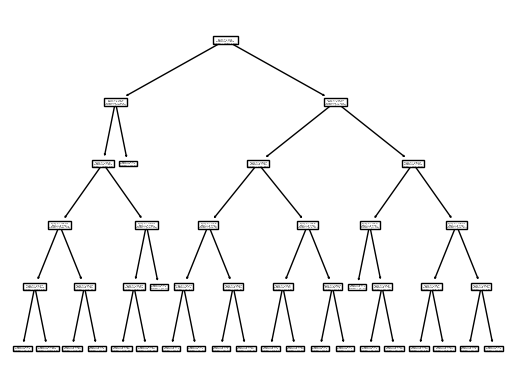

In [ ]:
tree.plot_tree(DecisionTreeModel)

In [ ]:
DecisionTreeModel.feature_importances_

array([0.14270574, 0.        , 0.10033971, 0.21398325, 0.54297131])

In [ ]:
X_train.head()

,Age,Pregnancy No,Height,BMI,Heredity
493,41,3,155,25.8,0
233,24,2,140,32.7,1
985,39,4,167,24.4,1
240,25,2,159,25.7,0
234,24,2,141,32.2,1


##**Using Random Forest**

In [ ]:
from sklearn.ensemble import RandomForestClassifier

In [ ]:
forest_model=RandomForestClassifier(n_estimators=100,max_depth=5)
forest_model.fit(X_train,y_train)
y_forest_pred=forest_model.predict(X_test)

In [ ]:
print(confusion_matrix(y_test,y_forest_pred))

[[160   5]
 [ 24  14]]


In [ ]:
forest_model.score(X_test,y_test)

0.8571428571428571

##**Using KNN**

In [ ]:
from sklearn.neighbors import KNeighborsClassifier

In [ ]:
knn_model=KNeighborsClassifier(n_neighbors=5)
knn_model.fit(X_train,y_train)
y_knn_pred=knn_model.predict(X_test)

print(knn_model.score(X_test,y_test))
print(confusion_matrix(y_test,y_knn_pred))
print(classification_report(y_test,y_knn_pred))

0.8177339901477833
[[151  14]
 [ 23  15]]
              precision    recall  f1-score   support

           0       0.87      0.92      0.89       165
           1       0.52      0.39      0.45        38

    accuracy                           0.82       203
   macro avg       0.69      0.65      0.67       203
weighted avg       0.80      0.82      0.81       203



In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.neural_network import MLPClassifier
from imblearn.over_sampling import SMOTE
from imblearn.under_sampling import RandomUnderSampler
from imblearn.pipeline import Pipeline

# Split the data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Resampling strategies
oversample = SMOTE()
undersample = RandomUnderSampler()
steps = [('o', oversample), ('u', undersample)]
pipeline = Pipeline(steps=steps)

# Resample the training data
X_train_resampled, y_train_resampled = pipeline.fit_resample(X_train, y_train)

# Initialize classifiers with class weights
classifiers = {
    "Logistic Regression": LogisticRegression(class_weight='balanced'),
    "Decision Tree": DecisionTreeClassifier(class_weight='balanced'),
    "Random Forest": RandomForestClassifier(class_weight='balanced'),
    "Gradient Boosting": GradientBoostingClassifier(),
    "SVM": SVC(class_weight='balanced', probability=True),
    "KNN": KNeighborsClassifier(),
    "Naive Bayes": GaussianNB(),
    "Neural Network": MLPClassifier()
}

# Train and evaluate each classifier
for name, clf in classifiers.items():
    clf.fit(X_train_resampled, y_train_resampled)
    y_pred = clf.predict(X_test)
    accuracy = accuracy_score(y_test, y_pred)
    precision = precision_score(y_test, y_pred)
    recall = recall_score(y_test, y_pred)
    f1 = f1_score(y_test, y_pred)
    print(f"{name} - Accuracy: {accuracy:.2f}, Precision: {precision:.2f}, Recall: {recall:.2f}, F1 Score: {f1:.2f}")
    print(confusion_matrix(y_test, y_pred))



Logistic Regression - Accuracy: 0.76, Precision: 0.51, Recall: 0.74, F1 Score: 0.60
[[117  36]
 [ 13  37]]
Decision Tree - Accuracy: 0.75, Precision: 0.50, Recall: 0.64, F1 Score: 0.56
[[121  32]
 [ 18  32]]
Random Forest - Accuracy: 0.78, Precision: 0.54, Recall: 0.68, F1 Score: 0.60
[[124  29]
 [ 16  34]]
Gradient Boosting - Accuracy: 0.78, Precision: 0.54, Recall: 0.68, F1 Score: 0.60
[[124  29]
 [ 16  34]]
SVM - Accuracy: 0.73, Precision: 0.47, Recall: 0.76, F1 Score: 0.58
[[111  42]
 [ 12  38]]
KNN - Accuracy: 0.75, Precision: 0.49, Recall: 0.76, F1 Score: 0.60
[[114  39]
 [ 12  38]]
Naive Bayes - Accuracy: 0.77, Precision: 0.52, Recall: 0.74, F1 Score: 0.61
[[119  34]
 [ 13  37]]
Neural Network - Accuracy: 0.74, Precision: 0.49, Recall: 0.70, F1 Score: 0.57
[[116  37]
 [ 15  35]]
